In [1]:
import tweepy
import numpy as np
import pandas as pd
import nltk
import neattext.functions as nfx

In [2]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [5]:
import snscrape.modules.twitter as sntwitter

# By using snscrape it becomes very handy to scrape data from various social media platforms. In our project we have used twitter for tweets.

We just have to mention the size and #hashtag to search ( to the query) and rest all work is done in a very easy way.

In [6]:
def data_Aquistion(query):
    tweet_list = []
    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        info = vars(tweet)
        if len(tweet_list)>1500:
            break
        if info['lang']=='en':
            tweet_list.append(info['rawContent'])
    df=pd.DataFrame({"tweets":tweet_list})
    df.to_csv("C:/Users/xbhi0/OneDrive/Desktop/NLP/Tweet project/tweets_data.csv")
    
query="turkey"
data_Aquistion(query)

Here, we are reading the csv file saved earlier to train our model.

In [7]:
tweets = pd.read_csv("C:/Users/xbhi0/OneDrive/Desktop/NLP/Tweet project/tweets_data.csv")

In [8]:
tweets[0:100]

,Unnamed: 0,tweets
0,0,"Turkey, cheese, and almonds go together perfec..."
1,1,@vidsthatgohard When you realize that turkey i...
2,2,"@Wulf145 @TobiAyodele Answer: none, unless the..."
3,3,@39Ciggs @das_Ruka Not at all. Iraq under Sadd...
4,4,"@zaidkdahhaj Love it, I've done a thread on Tu..."
...,...,...
95,95,@PowerUSAID @WhiteHouse New Autocracies in the...
96,96,@ARGAtheropodfan Probably my favourite Phorusr...
97,97,"@HelluvaBttmCrtr lol not gonna happen, do it a..."
98,98,Disney should ask me to provide expert testimo...


We dont need the column 'Unnamed: 0' so we drop this column to improve our the quality of data for training.

In [9]:
tweets.drop(columns='Unnamed: 0')

,tweets
0,"Turkey, cheese, and almonds go together perfec..."
1,@vidsthatgohard When you realize that turkey i...
2,"@Wulf145 @TobiAyodele Answer: none, unless the..."
3,@39Ciggs @das_Ruka Not at all. Iraq under Sadd...
4,"@zaidkdahhaj Love it, I've done a thread on Tu..."
...,...
1496,"@PapoTerryDB @JamesARay @SpeakerMcCarthy So, h..."
1497,@CharliePawsUp You guys can do it. Stay Posit...
1498,"@TobiAyodele Serbia should apply, too. Althoug..."
1499,Kremlin: No decision on whether Putin will vis...


From here onwards we start the actual data cleaning process i.e. data pre-processing steps.

I have used Neattext library for this purpose as it very easy to use and gets the work done in very few lines of code.

In [10]:
tweets['tweets'] = tweets['tweets'].apply(nfx.remove_urls)
tweets['tweets'] = tweets['tweets'].apply(nfx.remove_userhandles)
tweets['tweets'] = tweets['tweets'].apply(nfx.remove_html_tags)
tweets['tweets'] = tweets['tweets'].apply(nfx.remove_emojis)
tweets['tweets'] = tweets['tweets'].apply(nfx.remove_stopwords)
tweets['tweets'] = tweets['tweets'].apply(nfx.remove_punctuations)
tweets['tweets'] = tweets['tweets'].apply(nfx.remove_hashtags)
tweets['tweets'] = tweets['tweets'].apply(nfx.remove_special_characters)
tweets['tweets'].head()

0            Turkey cheese almonds perfectly enjoy P3s
1                               realize turkey country
2    Answer none fucking nuke Also picture 2021 its...
3    all Iraq Saddam far prosperous country region ...
4                   Love it Ive thread Turkey Tail too
Name: tweets, dtype: object

# TOKENIZATION STEP

In [11]:
def tokenized_data(text):
    text = ' '.join([i for i in nltk.word_tokenize(text)])
    return text

In [12]:
tweets['tweets'] = tweets['tweets'].apply(tokenized_data)
tweets['tweets']

0               Turkey cheese almonds perfectly enjoy P3s
1                                  realize turkey country
2       Answer none fucking nuke Also picture 2021 its...
3       all Iraq Saddam far prosperous country region ...
4                      Love it Ive thread Turkey Tail too
                              ...                        
1496    So Biden cause inflation Germany Spain Italy U...
1497    guys it Stay Positive Pray snow Im gon na buy ...
1498    Serbia apply too smaller significance block en...
1499    Kremlin decision Putin visit Turkey April View...
1500    night game opening day worse making bacon maki...
Name: tweets, Length: 1501, dtype: object

I have performed the below step to double check for unnecessary special characterss.

In [13]:
waste_list = ['..','...','....','.....', '#',':']

def remove_dots(text):
    text = ' '.join([i for i in text.split() if i not in waste_list])
    return text

tweets['tweets'] = tweets['tweets'].apply(remove_dots)
tweets['tweets'].head()

0            Turkey cheese almonds perfectly enjoy P3s
1                               realize turkey country
2    Answer none fucking nuke Also picture 2021 its...
3    all Iraq Saddam far prosperous country region ...
4                   Love it Ive thread Turkey Tail too
Name: tweets, dtype: object

Converting the text into lower case, this is important for training point of view.

In [14]:
def lower_case(text):
    text = ' '.join(i.lower() for i in text.split())
    return text

tweets['tweets'] = tweets['tweets'].apply(lower_case)
tweets['tweets'].head()

0            turkey cheese almonds perfectly enjoy p3s
1                               realize turkey country
2    answer none fucking nuke also picture 2021 its...
3    all iraq saddam far prosperous country region ...
4                   love it ive thread turkey tail too
Name: tweets, dtype: object

In [15]:
type(tweets)

pandas.core.frame.DataFrame

In [16]:
tweets

,Unnamed: 0,tweets
0,0,turkey cheese almonds perfectly enjoy p3s
1,1,realize turkey country
2,2,answer none fucking nuke also picture 2021 its...
3,3,all iraq saddam far prosperous country region ...
4,4,love it ive thread turkey tail too
...,...,...
1496,1496,so biden cause inflation germany spain italy u...
1497,1497,guys it stay positive pray snow im gon na buy ...
1498,1498,serbia apply too smaller significance block en...
1499,1499,kremlin decision putin visit turkey april view...


In [17]:
tweets['tweets'][0]

'turkey cheese almonds perfectly enjoy p3s'

# STEMMING

In [18]:
from nltk.stem import PorterStemmer

def stemming(text):
    ps = PorterStemmer()
    text = ' '.join([ps.stem(i) for i in text.split()])
    return text

tweets['tweets'] = tweets['tweets'].apply(stemming)


In [19]:
tweets['tweets'].head()

0               turkey chees almond perfectli enjoy p3
1                                realiz turkey countri
2    answer none fuck nuke also pictur 2021 it nort...
3    all iraq saddam far prosper countri region thi...
4                   love it ive thread turkey tail too
Name: tweets, dtype: object

As we dont have labelled dataset, so we are going to get the polarity score of the tweets and based on the polarity score we are going to label them.

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xbhi0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
sia = SentimentIntensityAnalyzer()

polarities = []
for text in tweets['tweets']:
    polarity = sia.polarity_scores(text)['compound']
    polarities.append(polarity)

print("Polarity scores:", polarities)


Polarity scores: [0.4939, 0.0, -0.5346, 0.0, 0.6369, 0.4404, 0.4215, 0.0, 0.6369, -0.3182, 0.3182, 0.2023, -0.2732, 0.0, 0.0, -0.6486, 0.0, -0.296, 0.5719, 0.1531, -0.128, 0.8176, 0.0, 0.0, -0.3252, 0.3818, -0.4939, 0.0, -0.2924, -0.1027, 0.4215, 0.0, 0.0, 0.1531, 0.6249, -0.2023, 0.3182, 0.3818, 0.4404, 0.0, 0.0, 0.0, 0.6369, -0.2617, 0.0, 0.34, -0.128, 0.0, 0.5719, 0.0, -0.5994, 0.3612, 0.0, 0.0, 0.4767, 0.3612, 0.3612, 0.0, 0.1551, 0.0, -0.4215, 0.0, -0.2732, 0.0, 0.7964, -0.0258, 0.0, -0.25, 0.5267, 0.6486, 0.743, -0.1027, 0.0, 0.6249, 0.5994, 0.743, 0.0, 0.7684, 0.0, 0.3612, 0.3612, 0.5994, 0.0, 0.0, 0.0, 0.296, 0.296, -0.7506, 0.0, 0.0, 0.0, 0.0, 0.4404, 0.0, 0.0, 0.0, 0.7534, 0.0516, -0.3818, 0.0, 0.0, 0.0, 0.4664, 0.5574, 0.0, 0.7783, 0.0, 0.0, 0.0, -0.9082, 0.0, 0.4939, 0.3612, 0.6369, 0.0, -0.25, 0.0, 0.0, -0.6808, 0.0, 0.0, 0.5574, 0.0, 0.0772, 0.0, -0.5106, 0.8658, 0.0, 0.1779, -0.7184, 0.0, 0.0, 0.4019, -0.5994, 0.0, -0.3818, 0.5859, 0.5423, 0.0, 0.0, 0.0, 0.743, 0.5106, 0

In [22]:
len(polarities)

1501

In [23]:
type(polarities)

list

# The score 0 = neutral
# score < 0 = Negative
# score > 0 = Positive

Adding a column for polarity score in our dataset.

In [24]:
tweets['polarities'] = pd.DataFrame(polarities)

In [25]:
tweets[0:10]

,Unnamed: 0,tweets,polarities
0,0,turkey chees almond perfectli enjoy p3,0.4939
1,1,realiz turkey countri,0.0000
2,2,answer none fuck nuke also pictur 2021 it nort...,-0.5346
3,3,all iraq saddam far prosper countri region thi...,0.0000
4,4,love it ive thread turkey tail too,0.6369
5,5,year ago guy went busi busi sell patti cant re...,0.4404
6,6,yesterday senat pass resolut unanim consent se...,0.4215
7,7,turkey anim shot spike,0.0000
8,8,love reloc turkey mean there zero mjolo,0.6369
9,9,result collis truck 2 pickup truck citi urfa t...,-0.3182


Based on the polarity score we assign the tweet a neutral,negative or positive sentiment label.

In [26]:
def get_label(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

Again adding a sentiment label column.

In [27]:
tweets["sentiment"] = tweets["polarities"].apply(lambda x: get_label(x))

In [28]:
tweets

,Unnamed: 0,tweets,polarities,sentiment
0,0,turkey chees almond perfectli enjoy p3,0.4939,positive
1,1,realiz turkey countri,0.0000,neutral
2,2,answer none fuck nuke also pictur 2021 it nort...,-0.5346,negative
3,3,all iraq saddam far prosper countri region thi...,0.0000,neutral
4,4,love it ive thread turkey tail too,0.6369,positive
...,...,...,...,...
1496,1496,so biden caus inflat germani spain itali uk ca...,0.0000,neutral
1497,1497,guy it stay posit pray snow im gon na buy coup...,0.6124,positive
1498,1498,serbia appli too smaller signific block entri ...,-0.4404,negative
1499,1499,kremlin decis putin visit turkey april view more,0.0000,neutral


This is the overview of labels for our data.

In [29]:
tweets['sentiment'].value_counts()

neutral     623
positive    543
negative    335
Name: sentiment, dtype: int64

In [33]:
y = tweets['sentiment'].value_counts()

In [31]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

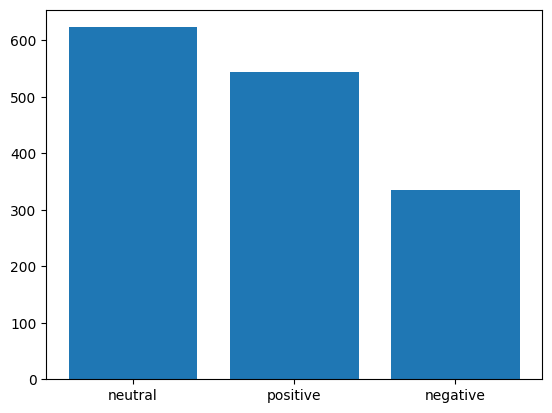

In [34]:
plt.bar(x=['neutral','positive','negative'],height=y)